In [2]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data  = make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=3, n_clusters_per_class=1)

In [110]:
Y = data[1]

In [18]:
X = data[0]

In [19]:
X.shape

(400, 2)

In [20]:
Y[Y==0] = -1

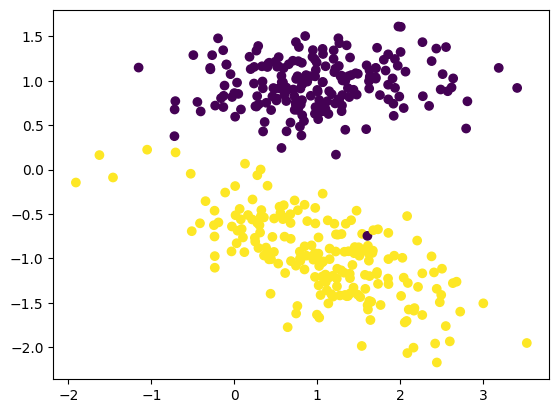

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=Y)

In [76]:
class SVM:
    def __init__(self, c=1.0):
        self.c = c
        self.w = 0
        self.b = 0

    def hingeLoss(self, X, Y, W, B):
        err = 0.5 * np.dot(W, W.T)
        for i in range(X.shape[0]):
            ti = Y[i] * (np.dot(X[i], W) + B)
            err += max(0, 1 - ti)
        return err
    
    def fit(self, X, Y, batch_size=200, max_iters=300, alpha=0.001):
        m = X.shape[0]
        n = X.shape[1]
        w = np.zeros((n, ))
        bias = 0
        c = self.c
        losses = []
        for i in range(max_iters):
            loss = self.hingeLoss(X, Y, w, bias)
            Y_ = np.arange(m)
            np.random.shuffle(Y_)
            losses.append(loss)
            for batch in range(0, m, batch_size):
                gradw = 0
                gradb = 0
                for j in range(batch, batch + batch_size):
                    if j < m:
                        k = Y_[j]
                        ti = Y[k] * (np.dot(X[k], w) + bias)
                        if ti >= 1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c * Y[k] * X[k]
                            gradb += c * Y[k]
                w = w - alpha * w + alpha * gradw
                bias = bias + alpha * gradb

        self.b = bias
        self.w = w
        return self.b, self.w, losses
    
                
        

In [77]:
svm = SVM()

In [78]:
W = np.zeros((2,))
B = 0
svm.hingeLoss(X, Y, W, B)

400.0

In [94]:
b, w, losses = svm.fit(X, Y)

In [96]:
C = [0.1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0, 100.0]
tup = []
for c in C:
    svm = SVM(c=c)
    b, w, l = svm.fit(X, Y)
    tup.append((b, w, c))

In [83]:
w

array([-0.47993117, -2.41695834])

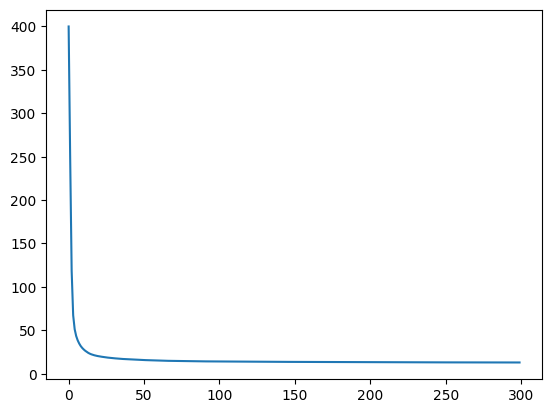

In [85]:
plt.plot(losses)

[-0.15748635 -1.5503814 ] 0.22290000000000007 0.1


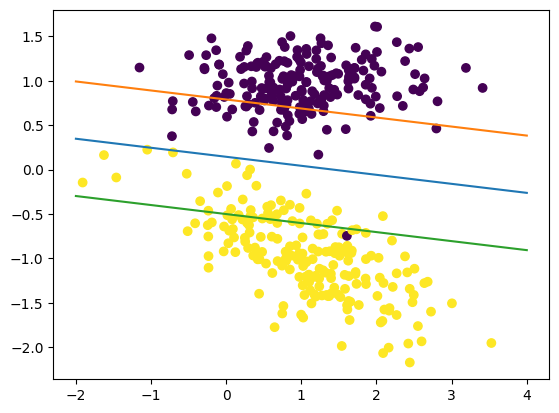

[-0.24087755 -1.72868447] 0.29000000000000004 0.2


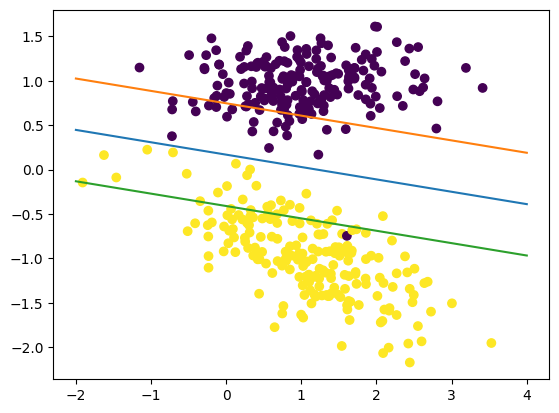

[-0.2702493  -1.87935104] 0.3105000000000002 0.3


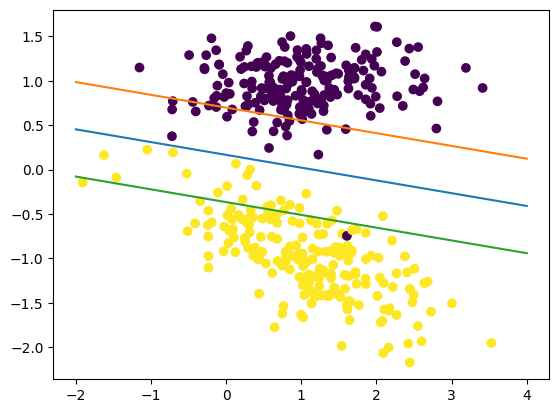

[-0.33783335 -2.06589803] 0.4095000000000003 0.5


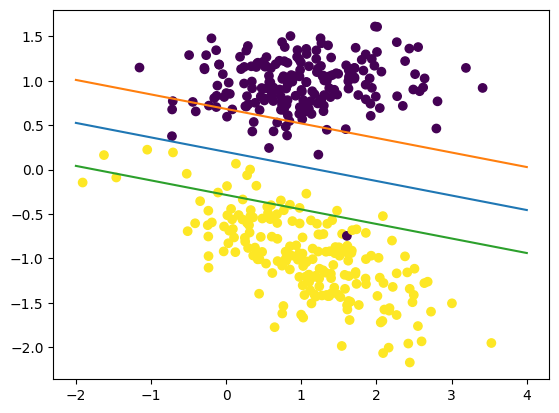

[-0.48074789 -2.41825737] 0.5240000000000004 1.0


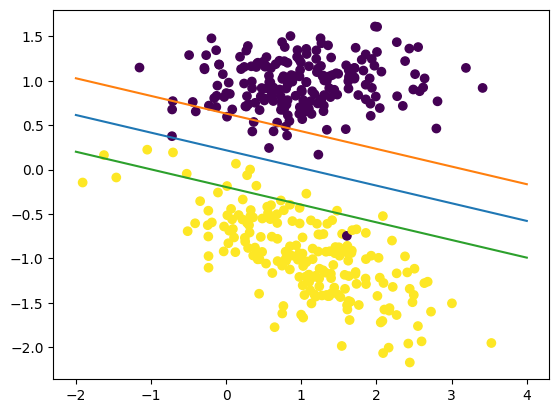

[-0.58268984 -2.77148328] 0.5760000000000003 2.0


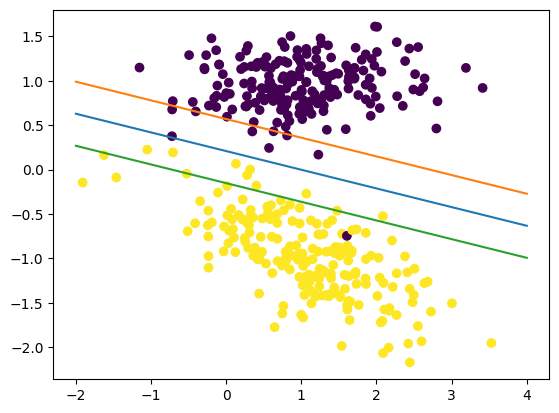

[-0.6775189  -3.04969143] 0.7170000000000004 3.0


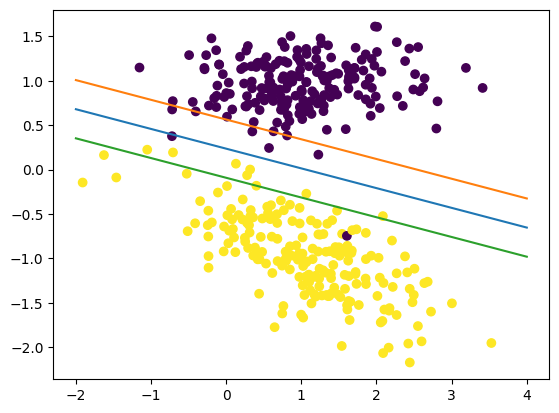

[-0.82984525 -3.45121386] 0.9050000000000005 5.0


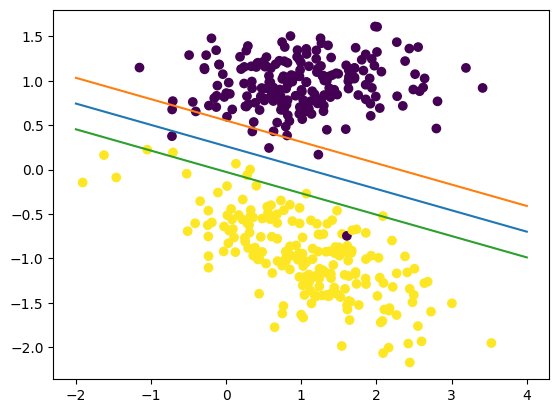

[-1.01739387 -4.04542988] 1.0200000000000005 10.0


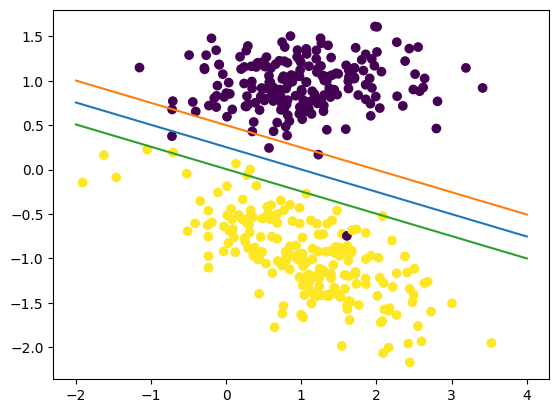

[-1.15845311 -5.20553086] 1.299999999999998 100.0


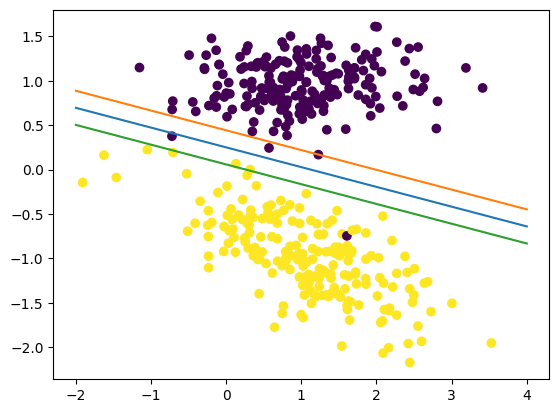

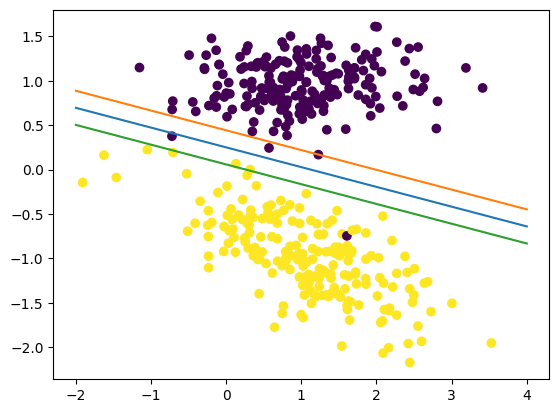

In [97]:
def plotline(X, Y, W, B):
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    x = np.linspace(-2, 4, 10)
    y = -(W[0]*x + B)/W[1]
    y1 = -(W[0]*x + B+1)/W[1]
    y2 = -(W[0]*x + B-1)/W[1]
    plt.plot(x, y)
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.show()

for t in tup:
    print(t[1], t[0], t[2])
    plotline(X, Y, t[1], t[0])

plotline(X,Y,w,b)

In [98]:
svm = SVM()
b, w, l = svm.fit(X, Y)

In [99]:
b, w    

(0.5230000000000004, array([-0.48089157, -2.41813293]))

In [112]:
yp = []
for x in X:
    yp.append((np.dot(w, x.T) + b))

In [113]:
yp = [1 if i >= 0 else -1 for i in yp]

In [114]:
np.sum(yp == Y)

399